# 케라스 보스턴 주택 가격 모델

### modules import

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.datasets.boston_housing import load_data
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

### 데이터 로드
- 데이터의 수가 상당히 적기 때문에 테스트 데이터의 비율을 20%로 지정

- 13개의 특성을 가짐

- 각각의 특성이 모두 다른 스케일, 즉 단위가 모두 다름
  - 범죄율: 0~1 사이의 값
  - 방의 개수 3~9 사이의 값

- 정답 레이블은 주택 가격의 중간가격($1000 단위)

In [3]:
seed = 42
tf.random.set_seed(seed)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path="boston_housing.npz", test_split=0.2, seed=seed)

### 데이터 확인

In [4]:
print(f"Train data: {x_train_full.shape}\t Label data: {y_train_full.shape}")
print(f"Test data: {x_test.shape}\t Label data: {y_test.shape}")

Train data: (404, 13)	 Label data: (404,)
Test data: (102, 13)	 Label data: (102,)


In [5]:
print(x_train_full[0])

[9.1780e-02 0.0000e+00 4.0500e+00 0.0000e+00 5.1000e-01 6.4160e+00
 8.4100e+01 2.6463e+00 5.0000e+00 2.9600e+02 1.6600e+01 3.9550e+02
 9.0400e+00]


In [6]:
print(y_train_full[0])

23.6


### 데이터 전처리
- Standardization

- 특성의 단위가 모두 다르기 때문에 **동일한 범위로 조정**

In [7]:
from sklearn.preprocessing import StandardScaler

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=seed)

scaler = StandardScaler()
x_train_preprocessed = scaler.fit_transform(x_train)
x_val_preprocessed =scaler.transform(x_val)
x_test_preprocessed = scaler.transform(x_test)

In [8]:
print(f"Total train data: {x_train_full.shape}\tLabel: {y_train_full.shape}")
print(f"Train data: {x_train.shape}\tLabel: {y_train.shape}")
print(f"Validation data: {x_val.shape}\tLabel: {y_val.shape}")
print(f"Test data: {x_test.shape}\tLabel: {y_test.shape}")

Total train data: (404, 13)	Label: (404,)
Train data: (282, 13)	Label: (282,)
Validation data: (122, 13)	Label: (122,)
Test data: (102, 13)	Label: (102,)


### 모델 구성
- 학습 데이터가 매우 적은 경우에 모델의 깊이를 깊게 할수록  
  과대적합(Overfitting)이 일어날 확률이 높음

In [9]:
inp = Input(shape=(13, ), name="Input")
hidden_1 = Dense(100, activation="relu", name="Dense_1")(inp)
hidden_2 = Dense(64, activation="relu", name="Dense_2")(hidden_1)
hidden_3 = Dense(32, activation="relu", name="Dense_3")(hidden_2)
out = Dense(1, activation="relu", name="Output")(hidden_3)

model = Model(inputs=inp, outputs=out)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 13)]              0         
                                                                 
 Dense_1 (Dense)             (None, 100)               1400      
                                                                 
 Dense_2 (Dense)             (None, 64)                6464      
                                                                 
 Dense_3 (Dense)             (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 9977 (38.97 KB)
Trainable params: 9977 (38.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


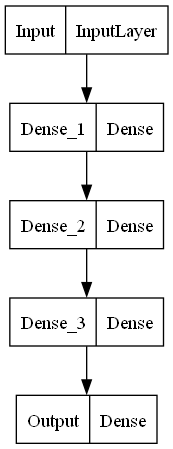

In [11]:
plot_model(model)

### 모델 컴파일(compile)

- 회귀 문제에서는 주로 평균제곱오차(MSE, Mean Squared Error)를 손실함수로,  
  평균절대오차(MAE, Mean Absolute Error)를 평가지표로 많이 사용!

In [12]:
model.compile(
    loss="mse",
    optimizer=Adam(learning_rate=1e-2),
    metrics=["mae"]
)

### 모델 학습

In [13]:
history = model.fit(
    x_train_preprocessed, y_train,
    epochs=300,
    validation_data=(x_val_preprocessed, y_val)
)

Epoch 1/300
9/9 [==============================] - 1s 20ms/step - loss: 475.0147 - mae: 19.5576 - val_loss: 172.4018 - val_mae: 11.1239
Epoch 2/300
9/9 [==============================] - 0s 5ms/step - loss: 104.0184 - mae: 7.8288 - val_loss: 37.9190 - val_mae: 4.8375
Epoch 3/300
9/9 [==============================] - 0s 3ms/step - loss: 43.2297 - mae: 4.7967 - val_loss: 23.7465 - val_mae: 3.7818
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 31.4477 - mae: 4.1781 - val_loss: 19.3924 - val_mae: 3.2704
Epoch 5/300
9/9 [==============================] - 0s 4ms/step - loss: 24.4586 - mae: 3.5678 - val_loss: 18.4314 - val_mae: 3.4998
Epoch 6/300
9/9 [==============================] - 0s 4ms/step - loss: 18.5565 - mae: 3.0987 - val_loss: 12.3622 - val_mae: 2.6921
Epoch 7/300
9/9 [==============================] - 0s 4ms/step - loss: 15.9504 - mae: 2.9301 - val_loss: 11.0097 - val_mae: 2.5999
Epoch 8/300
9/9 [==============================] - 0s 6ms/step - loss: 13.783

### 모델 평가
- `evaluate()`

In [14]:
model.evaluate(x_test_preprocessed, y_test)

4/4 [==============================] - 0s 0s/step - loss: 13.5333 - mae: 2.3141


[13.533282279968262, 2.314096689224243]

In [15]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


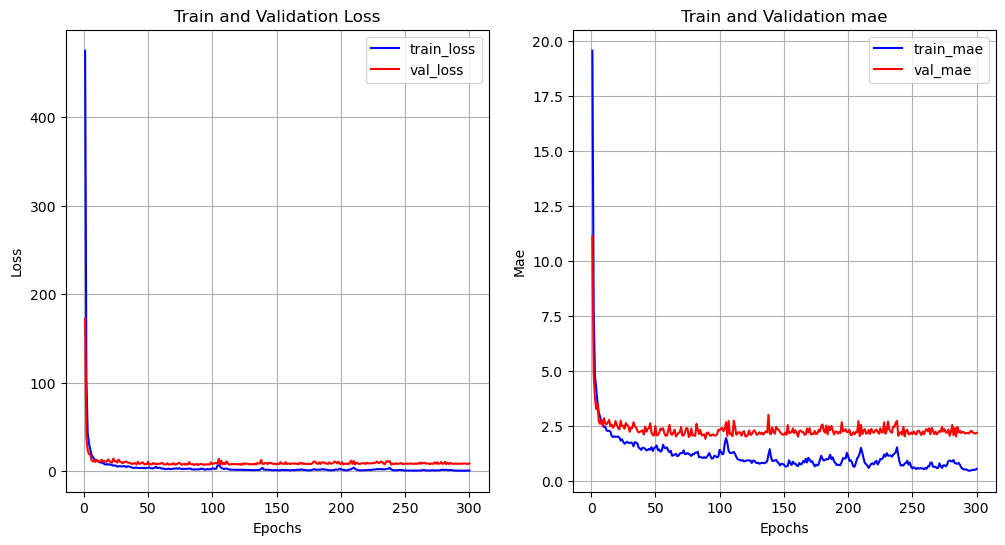

In [16]:
history_dict = history.history

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 6))

ax_1 = fig.add_subplot(1, 2, 1)
ax_1.plot(epochs, loss, color="blue", label="train_loss")
ax_1.plot(epochs, val_loss, color="red", label="val_loss")
ax_1.set_title("Train and Validation Loss")
ax_1.set_xlabel("Epochs")
ax_1.set_ylabel("Loss")
ax_1.grid()
ax_1.legend()

mae = history_dict["mae"]
val_mae = history_dict["val_mae"]

ax_2 = fig.add_subplot(1, 2, 2)
ax_2.plot(epochs, mae, color="blue", label="train_mae")
ax_2.plot(epochs, val_mae, color="red", label="val_mae")
ax_2.set_title("Train and Validation mae")
ax_2.set_xlabel("Epochs")
ax_2.set_ylabel("Mae")
ax_2.grid()
ax_2.legend()

plt.show()

### K-Fold 교차 검증

- 데이터셋의 크기가 매우 작은 경우에  
  [훈련, 검증, 테스트] 데이터로 나누게 되면 과소적합이 일어날 확률이 높음

- 이를 해결하기 위해 K-Fold 교차 검증 실행
  <br>

  <img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="600">

  <sub>출처: https://scikit-learn.org/stable/modules/cross_validation.html</sub>

### 모델 재구성

In [17]:
from sklearn.model_selection import KFold

In [18]:
seed = 42
tf.random.set_seed(seed)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path="boston_housing.npz", test_split=0.2, seed=seed)

scaler = StandardScaler()
x_train_preprocessed = scaler.fit_transform(x_train_full)
x_test_preprocessed = scaler.transform(x_test)

In [19]:
k = 3
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

In [20]:
def build_model():
    inp = Input(shape=(13, ), name="Input")
    hidden_1 = Dense(100, activation="relu", name="Dense_1")(inp)
    hidden_2 = Dense(64, activation="relu", name="Dense_2")(hidden_1)
    hidden_3 = Dense(32, activation="relu", name="Dense_3")(hidden_2)
    out = Dense(1, activation="relu", name="Output")(hidden_3)

    model = Model(inputs=inp, outputs=out)

    model.compile(
        loss="mse",
        optimizer=Adam(),
        metrics=["mae"]
    )
    
    return model

In [21]:
mae_list = []

In [22]:
for train_idx, val_idx in kfold.split(x_train_preprocessed):
    x_train_fold, x_val_fold = x_train_preprocessed[train_idx], x_train_preprocessed[val_idx]
    y_train_fold, y_val_fold = y_train_full[train_idx], y_train_full[val_idx]

    model = build_model()

    model.fit(
        x_train_fold, y_train_fold,
        epochs=300,
        validation_data=(x_val_fold, y_val_fold)
    )
    _, test_mae = model.evaluate(x_test_preprocessed, y_test)
    mae_list.append(test_mae)


Epoch 1/300


9/9 [==============================] - 1s 19ms/step - loss: 589.6988 - mae: 22.4437 - val_loss: 520.5624 - val_mae: 20.8741
Epoch 2/300
9/9 [==============================] - 0s 6ms/step - loss: 541.6368 - mae: 21.3739 - val_loss: 466.0922 - val_mae: 19.5947
Epoch 3/300
9/9 [==============================] - 0s 4ms/step - loss: 470.4517 - mae: 19.7309 - val_loss: 383.8873 - val_mae: 17.4791
Epoch 4/300
9/9 [==============================] - 0s 4ms/step - loss: 366.1001 - mae: 16.9890 - val_loss: 266.4597 - val_mae: 13.9824
Epoch 5/300
9/9 [==============================] - 0s 4ms/step - loss: 227.6954 - mae: 12.7730 - val_loss: 143.1277 - val_mae: 9.9469
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 114.0447 - mae: 8.0697 - val_loss: 88.8161 - val_mae: 7.7509
Epoch 7/300
9/9 [==============================] - 0s 3ms/step - loss: 86.8456 - mae: 7.4612 - val_loss: 77.2219 - val_mae: 6.9789
Epoch 8/300
9/9 [==============================] - 0s 5ms/step - loss: 64.

In [23]:
mae_list

[2.364670515060425, 2.2748382091522217, 2.511347770690918]

In [24]:
np.mean(mae_list)

2.3836188316345215